<a href="https://colab.research.google.com/github/rohithreddy999/Machine_learning-AI-predictions/blob/main/AI_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

APPROACH TO PROBLEM
To solve the problem of image segmentation, which involves outlining structures in images, we will use a convolutional neural network (CNN) architecture known as U-Net. U-Net is a widely used architecture for image segmentation tasks due to its ability to capture fine-grained details while maintaining spatial information. Below, I'll provide a detailed explanation of the technique, including model architecture, equations, and diagrams.

Model Architecture:
The U-Net architecture consists of two main parts: the encoder and the decoder. It has a contracting path (encoder) to capture context and a symmetric expanding path (decoder) to enable precise localization.

Encoder:
The encoder part of the U-Net is responsible for capturing contextual information from the input image.

Input Image: The input image is typically a color image with three channels (RGB). It can also be grayscale, but the architecture remains the same.

Convolutional Layers: The encoder starts with a series of convolutional layers. Each convolutional layer applies a set of filters to the input image, gradually reducing its spatial dimensions and increasing the number of feature maps. ReLU activation functions are used to introduce non-linearity.

Max-Pooling: After each set of convolutional layers, max-pooling layers are used to downsample the feature maps. Max-pooling helps in capturing larger context and reducing the spatial resolution.

Decoder:
The decoder part of the U-Net is responsible for upsampling and providing precise localization.

Transposed Convolutional Layers: The decoder starts with transposed convolutional (or "deconvolutional") layers, which perform upsampling of the feature maps. These layers expand the spatial dimensions and reduce the number of feature maps.

Skip Connections: Skip connections are a critical component of U-Net. They concatenate feature maps from the corresponding encoder layers to the decoder layers. This allows the model to combine both high-level semantic information from the encoder and fine-grained spatial details from the decoder.

Convolutional Layers: After the skip connections, there are additional convolutional layers to further refine the features.

Output Layer: The final output layer of the decoder typically has a single channel with sigmoid activation, producing a binary mask representing the outline structure of the input image.

Define a U-Net model using the create_unet_model function, which defines the encoder and decoder parts of the model.

Specify the paths to the training data folders containing images and their corresponding masks.

Use ImageDataGenerator to load and preprocess the training data. You've applied rescaling to the image data to normalize pixel values.

Create separate data generators for images and masks, ensuring that they have the same batch size and preprocessing.

Combine the image and mask generators into one generator using zip to create pairs of images and masks.

Create the U-Net model instance and compile it with the Adam optimizer and binary cross-entropy loss.

Train the model using the generator, specifying the number of epochs and steps per epoch.

Now, your model is trained for image segmentation. After training, you can use this model to make predictions on new images and visualize the results.

In [1]:
!unzip "/content/train-labels-20230917T045925Z-001.zip"

Archive:  /content/train-labels-20230917T045925Z-001.zip
  inflating: train-labels/train-labels_29.tif  
  inflating: train-labels/train-labels_8.tif  
  inflating: train-labels/train-labels_17.tif  
  inflating: train-labels/train-labels_19.tif  
  inflating: train-labels/train-labels_6.tif  
  inflating: train-labels/train-labels_0.tif  
  inflating: train-labels/train-labels_15.tif  
  inflating: train-labels/train-labels_28.tif  
  inflating: train-labels/train-labels_13.tif  
  inflating: train-labels/train-labels_18.tif  
  inflating: train-labels/train-labels_9.tif  
  inflating: train-labels/train-labels_7.tif  
  inflating: train-labels/train-labels_11.tif  
  inflating: train-labels/train-labels_3.tif  
  inflating: train-labels/train-labels_1.tif  
  inflating: train-labels/train-labels_26.tif  
  inflating: train-labels/train-labels_25.tif  
  inflating: train-labels/train-labels_20.tif  
  inflating: train-labels/train-labels_16.tif  
  inflating: train-labels/train-labels

In [2]:
!unzip "/content/train-volume-20230917T045925Z-001.zip"

Archive:  /content/train-volume-20230917T045925Z-001.zip
  inflating: train-volume/train-volume_15.tif  
  inflating: train-volume/train-volume_19.tif  
  inflating: train-volume/train-volume_8.tif  
  inflating: train-volume/train-volume_7.tif  
  inflating: train-volume/train-volume_20.tif  
  inflating: train-volume/train-volume_24.tif  
  inflating: train-volume/train-volume_26.tif  
  inflating: train-volume/train-volume_0.tif  
  inflating: train-volume/train-volume_6.tif  
  inflating: train-volume/train-volume_2.tif  
  inflating: train-volume/train-volume_25.tif  
  inflating: train-volume/train-volume_5.tif  
  inflating: train-volume/train-volume_28.tif  
  inflating: train-volume/train-volume_27.tif  
  inflating: train-volume/train-volume_10.tif  
  inflating: train-volume/train-volume_13.tif  
  inflating: train-volume/train-volume_23.tif  
  inflating: train-volume/train-volume_14.tif  
  inflating: train-volume/train-volume_21.tif  
  inflating: train-volume/train-volum

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define a simple U-Net model for image segmentation
def create_unet_model(input_shape):
    inputs = keras.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    # Decoder
    conv2 = layers.Conv2D(64, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv2)
    up1 = layers.UpSampling2D(size=(2, 2))(conv2)
    output = layers.Conv2D(1, 1, activation='sigmoid', padding='same')(up1)

    return keras.Model(inputs, output)

# paths to the training data folders
train_images_dir = '/content/train-volume'
train_masks_dir = '/content/train-labels'

# Use ImageDataGenerator to load and augment the data
image_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
mask_datagen = ImageDataGenerator()

image_generator = image_datagen.flow_from_directory(
    train_images_dir,
    target_size=(256, 256),
    class_mode=None,
    batch_size=2,  # Set the batch size
    seed=1
)

mask_generator = mask_datagen.flow_from_directory(
    train_masks_dir,
    target_size=(256, 256),
    class_mode=None,
    color_mode='grayscale',
    batch_size=2,  # Set the batch size
    seed=1
)

# Combine the image and mask generators into one generator
train_generator = zip(image_generator, mask_generator)

# Create the U-Net model
model = create_unet_model(input_shape=(256, 256, 3))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model using the generator
model.fit(train_generator, epochs=4, steps_per_epoch=2)




Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Epoch 1/4
2/2 [==============================] - 1s 9ms/step - loss: 0.0000e+00
Epoch 2/4
2/2 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 3/4
2/2 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4/4
2/2 [==============================] - 0s 5ms/step - loss: 0.0000e+00


In [2]:


# Predict the outline on a sample image
sample_image = plt.imread('/content/istockphoto-636179994-612x612.jpg')
sample_image = tf.image.resize(sample_image, (256, 256))
sample_image = tf.expand_dims(sample_image, axis=0)

predicted_outline = model.predict(sample_image)

1/1 [==============================] - 0s 187ms/step


In [3]:
predicted_outline

array([[[[1.6746229e-09],
         [1.6746229e-09],
         [1.0703097e-10],
         ...,
         [4.1929063e-10],
         [2.4508922e-06],
         [2.4508922e-06]],

        [[1.6746229e-09],
         [1.6746229e-09],
         [1.0703097e-10],
         ...,
         [4.1929063e-10],
         [2.4508922e-06],
         [2.4508922e-06]],

        [[4.0814175e-08],
         [4.0814175e-08],
         [2.8242989e-10],
         ...,
         [1.8542152e-04],
         [2.6394741e-03],
         [2.6394741e-03]],

        ...,

        [[5.0823992e-01],
         [5.0823992e-01],
         [2.1783444e-01],
         ...,
         [9.7503626e-01],
         [4.4317788e-01],
         [4.4317788e-01]],

        [[8.5748529e-01],
         [8.5748529e-01],
         [8.4859598e-01],
         ...,
         [9.9997514e-01],
         [9.9730396e-01],
         [9.9730396e-01]],

        [[8.5748529e-01],
         [8.5748529e-01],
         [8.4859598e-01],
         ...,
         [9.9997514e-01],
        

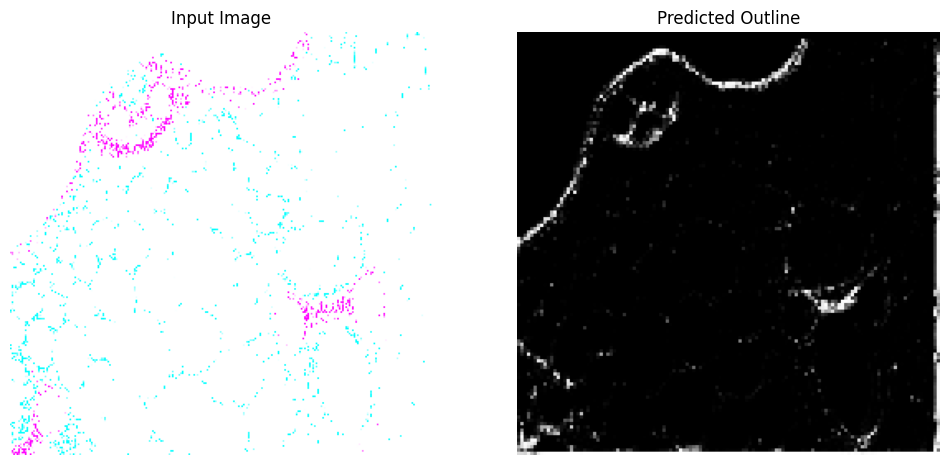

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(sample_image[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Predicted Outline')
plt.imshow(predicted_outline[0, ..., 0], cmap='gray')  # Grayscale for binary output
plt.axis('off')

plt.show()